In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/data.csv
/kaggle/input/healthcare/healthcare-dataset-stroke-data.csv


In [2]:
data=pd.read_csv("/kaggle/input/healthcare/healthcare-dataset-stroke-data.csv")

In [3]:
data

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.shape

(5110, 12)

In [5]:
data.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data["bmi"].fillna(data["bmi"].median(), inplace=True)

<ipython-input-9-7b09285e5784>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["bmi"].fillna(data["bmi"].median(), inplace=True)


In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
data['gender']=label_encoder.fit_transform(data['gender'])
data['ever_married']=label_encoder.fit_transform(data['ever_married'])
data['work_type']=label_encoder.fit_transform(data['work_type'])
data['Residence_type']=label_encoder.fit_transform(data['Residence_type'])
data['smoking_status']=label_encoder.fit_transform(data['smoking_status'])


In [12]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [13]:
data.mean()


id                   36517.829354
gender                   0.414286
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
ever_married             0.656164
work_type                2.167710
Residence_type           0.508023
avg_glucose_level      106.147677
bmi                     28.862035
smoking_status           1.376908
stroke                   0.048728
dtype: float64

In [14]:
numeric_column=data.select_dtypes(include='number').columns.tolist()

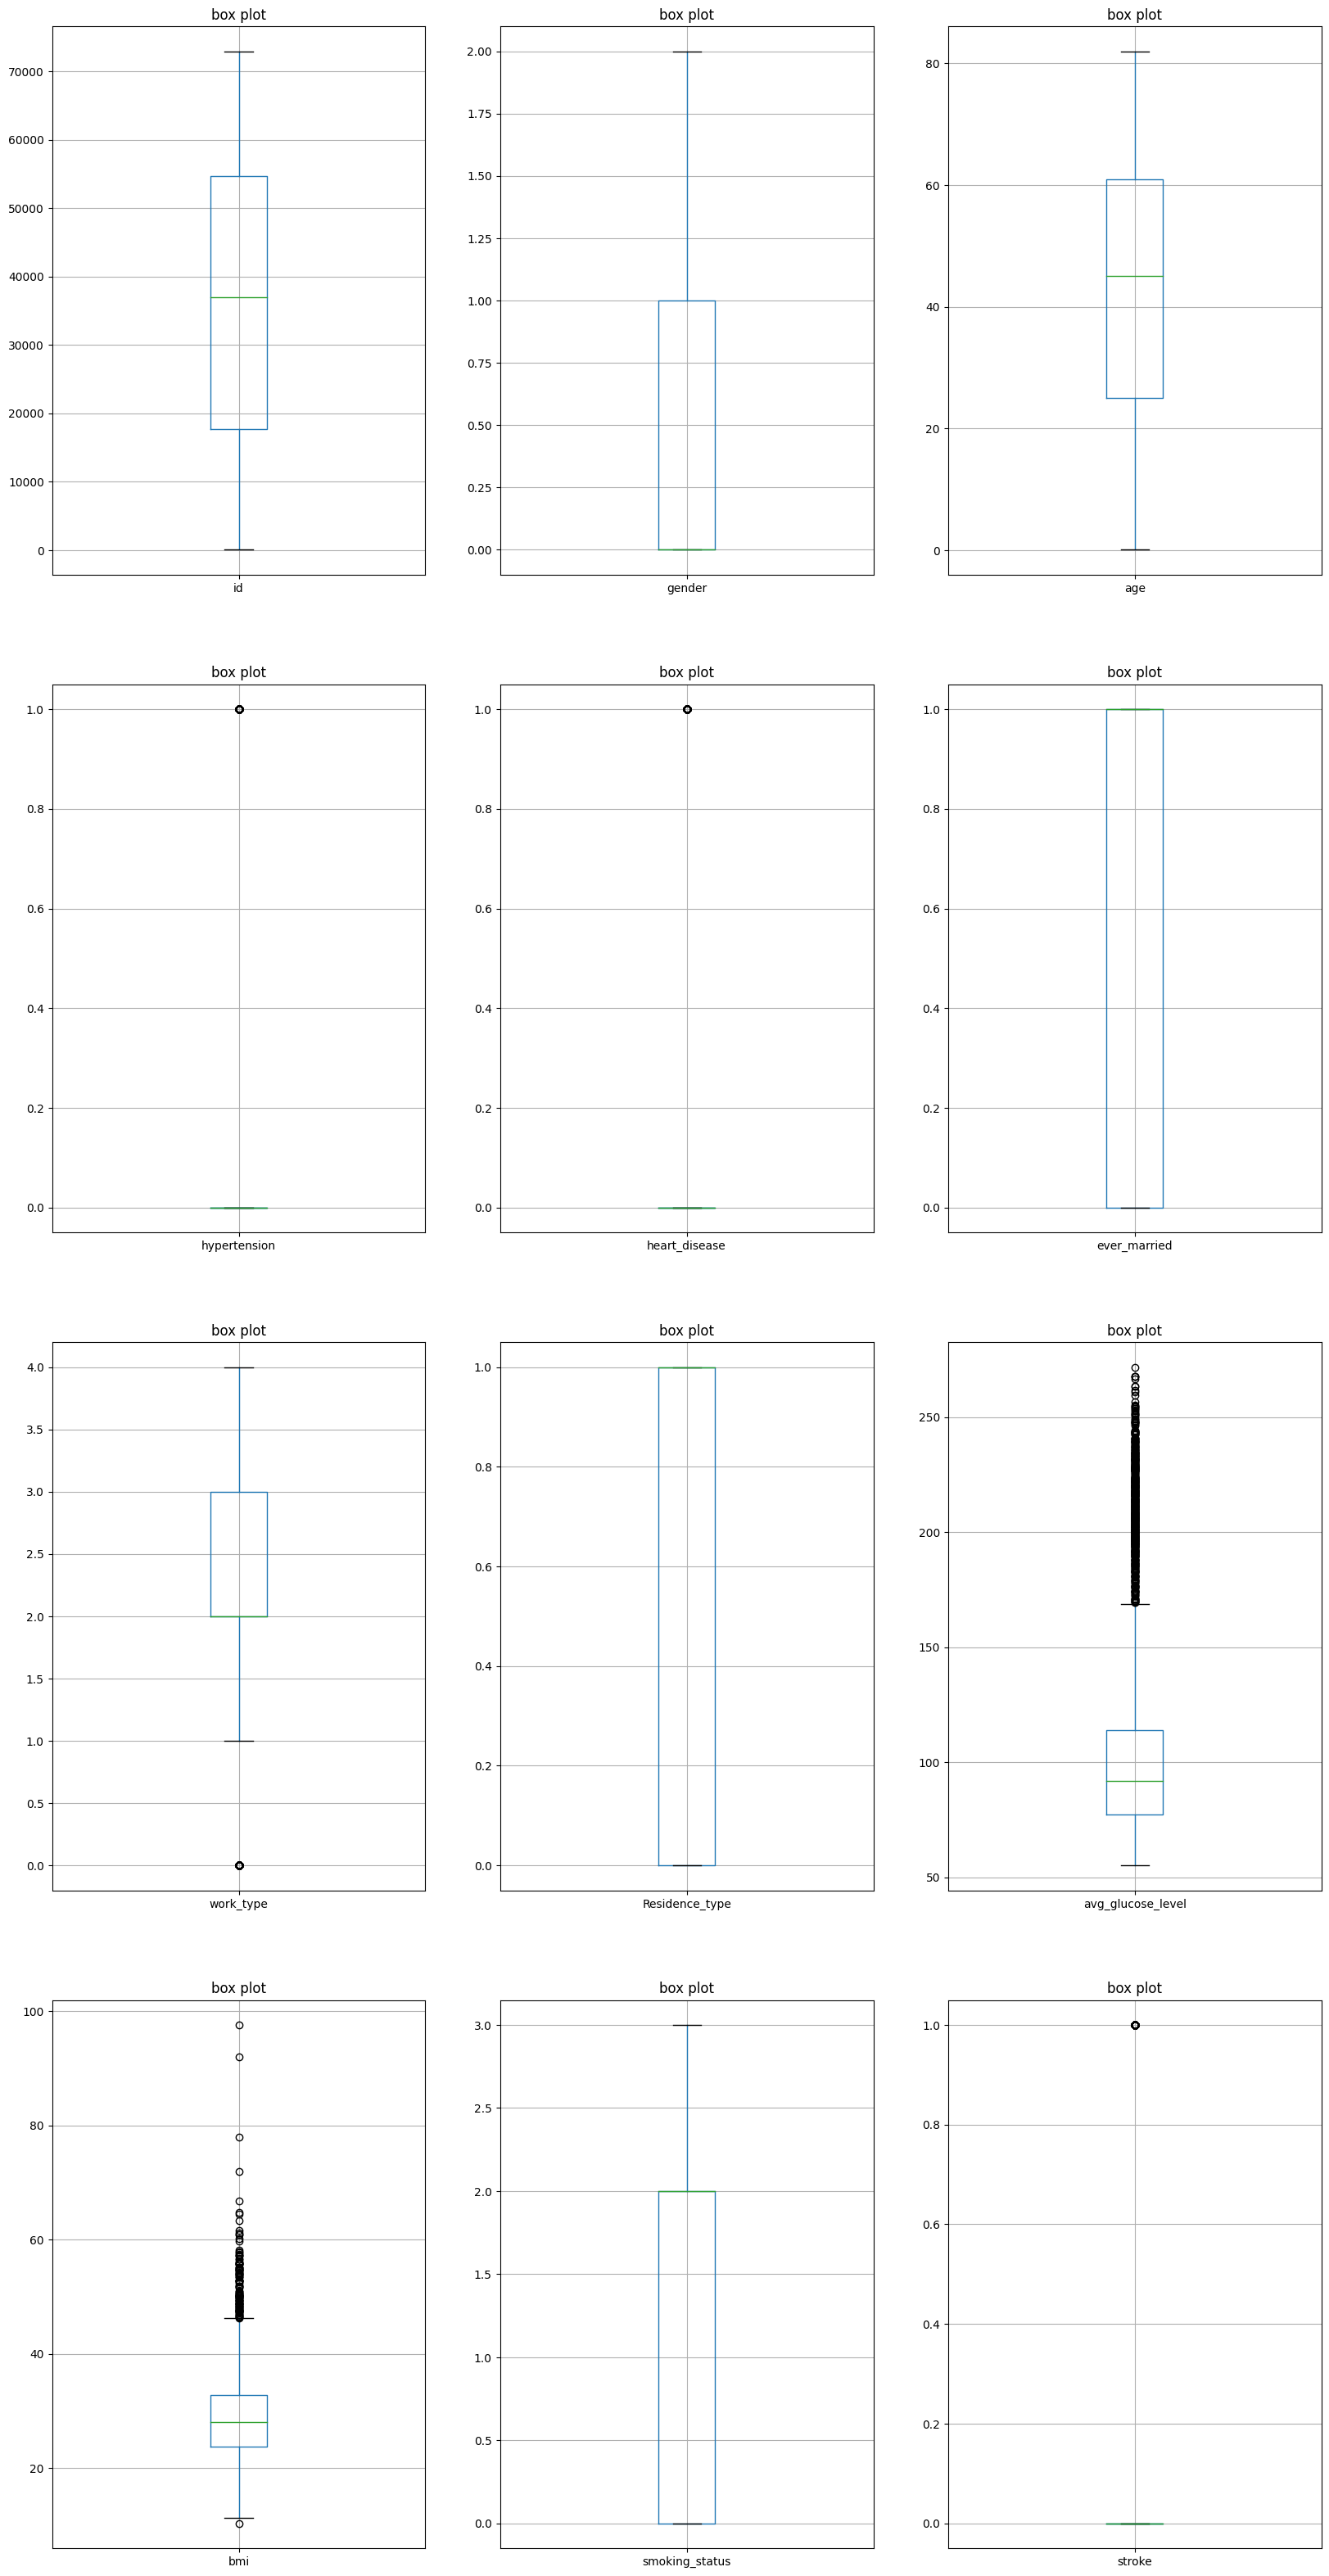

In [15]:
import math
num_plots=len(numeric_column)
num_cols=3
num_rows=math.ceil(num_plots/num_cols)

plt.figure(figsize=(20,40))
for i,col in enumerate(numeric_column,1):
    plt.subplot(num_rows,num_cols,i)
    data.boxplot(column=col)
    plt.title("box plot")


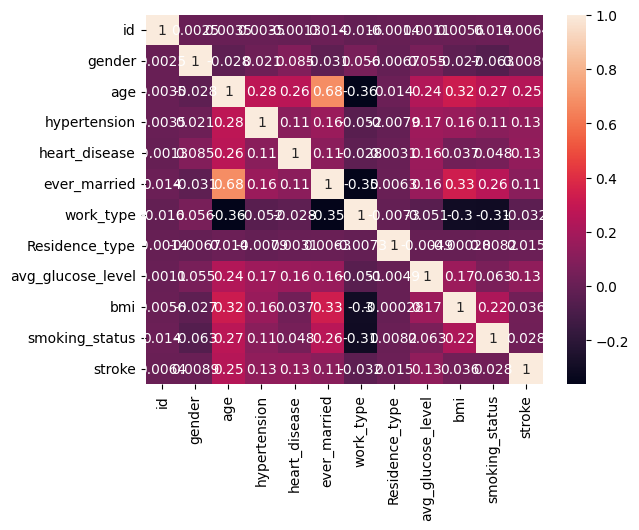

In [16]:
import seaborn as sns
corr=data.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True)
plt.show()

In [17]:
# Removing outliers based on IQR for a specific column
Q1 = data['stroke'].quantile(0.25)
Q3 = data['stroke'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['stroke'] >= Q1 - 1.5 * IQR) & (data['stroke'] <= Q3 + 1.5 * IQR)]
filtered_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,30468,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,16523,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,56543,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,46136,1,14.0,0,0,0,1,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [18]:
col=filtered_data.select_dtypes(include='number').columns.tolist()
features=filtered_data[col]
features.drop('stroke',axis=1,inplace=True)
features

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
249,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
250,30468,1,58.0,1,0,1,2,1,87.96,39.2,2
251,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
252,56543,0,70.0,0,0,1,2,0,69.04,35.9,1
253,46136,1,14.0,0,0,0,1,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.1,2
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1


In [19]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
features = scaler.fit_transform(features)
features

array([[-0.27551128,  1.19046506, -1.74841461, ..., -0.22069273,
        -1.38869131, -1.27407936],
       [-0.28502924,  1.19046506,  0.71909864, ..., -0.38400809,
         1.33748159,  0.58577042],
       [-0.94536762, -0.83858496, -1.52409522, ...,  0.13901164,
        -1.44012853, -1.27407936],
       ...,
       [-0.79383784, -0.83858496, -0.31277054, ..., -0.49737085,
         0.23158126,  0.58577042],
       [ 0.05004099,  1.19046506,  0.4050515 , ...,  1.40265285,
        -0.41138404, -0.34415447],
       [ 0.38790505, -0.83858496,  0.09100436, ..., -0.44513731,
        -0.33422821, -1.27407936]])

In [20]:
target=data['stroke']
target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [21]:
print("Shape of X:", features.shape)  # Should be (N, num_features)
print("Shape of y:", target.shape)  # Should be (N,)

Shape of X: (4861, 11)
Shape of y: (5110,)


In [22]:
import pandas as pd

# If X is a NumPy array, convert it back to a DataFrame
if isinstance(features, np.ndarray):
    features = pd.DataFrame(features)

# If y is a NumPy array, convert it back to a Series
if isinstance(target, np.ndarray):
    target = pd.Series(target)

In [23]:
print("Missing values in X:", features.isnull().sum().sum())
print("Missing values in y:", target.isnull().sum())


Missing values in X: 0
Missing values in y: 0


In [24]:
target = target.iloc[:len(features)]  # Trim y to match the length of X
print("New shape of target:", target.shape)


New shape of target: (4861,)


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    features, target, train_size=0.8, random_state=42, stratify=target
)

print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (3888, 11) (3888,)
Testing set shape: (973, 11) (973,)


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    features, target, train_size=0.8, random_state=42, stratify=target
)

print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (3888, 11) (3888,)
Testing set shape: (973, 11) (973,)


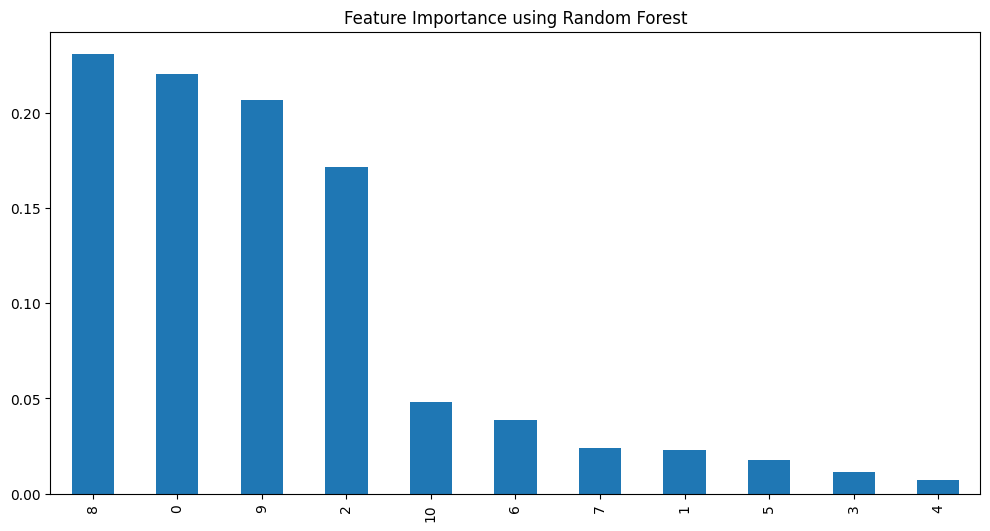

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Get feature importance scores
feature_importance = pd.Series(rf.feature_importances_, index=x_train.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.title("Feature Importance using Random Forest")
plt.show()


In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Perform RFE using Logistic Regression
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=8)  # Select the top 8 features
rfe.fit(x_train, y_train)

# Print selected features
selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index([1, 2, 3, 4, 6, 7, 8, 9], dtype='int64')


In [29]:
# Removing outliers based on IQR for a specific column
Q1 = data['stroke'].quantile(0.25)
Q3 = data['stroke'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['stroke'] >= Q1 - 1.5 * IQR) & (data['stroke'] <= Q3 + 1.5 * IQR)]

In [30]:
x_train

,0,1,2,3,4,5,6,7,8,9,10
1563,-1.142214,-0.838585,-0.312771,-0.312312,-0.222348,-1.346506,-0.159983,0.987529,-0.164582,-0.578555,-1.274079
2017,0.172827,-0.838585,0.629371,-0.312312,-0.222348,0.742663,0.750646,-1.012629,0.139696,-0.372806,-1.274079
1788,1.096449,-0.838585,0.135868,-0.312312,-0.222348,0.742663,-0.159983,0.987529,0.056898,0.102988,0.585770
3243,1.576940,-0.838585,0.091004,-0.312312,-0.222348,0.742663,-0.159983,-1.012629,-1.063044,1.067436,-1.274079
1803,-0.197331,-0.838585,-0.312771,-0.312312,-0.222348,0.742663,0.750646,0.987529,0.220213,-0.462821,1.515695
...,...,...,...,...,...,...,...,...,...,...,...
2572,-1.093914,-0.838585,1.302329,-0.312312,4.497452,0.742663,0.750646,-1.012629,-0.144737,0.115848,-1.274079
768,-0.158407,1.190465,1.661240,-0.312312,-0.222348,0.742663,0.750646,-1.012629,0.270850,0.604501,0.585770
3079,0.277525,1.190465,1.347193,-0.312312,4.497452,0.742663,0.750646,0.987529,-0.933715,0.090129,1.515695
1876,0.467648,1.190465,-0.223043,-0.312312,-0.222348,0.742663,-0.159983,-1.012629,-0.881025,-0.347088,0.585770


In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
print("New class distribution after SMOTE:\n", y_train.value_counts())


New class distribution after SMOTE:
 stroke
0    3689
1    3689
Name: count, dtype: int64


In [32]:
#KNN

In [33]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix






In [34]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [35]:
prediction=model.predict(x_test)

In [36]:
precision = precision_score(y_test, prediction)
print("Precision:", precision)

Precision: 0.04878048780487805


In [37]:
recall = recall_score(y_test, prediction)
print("Recall:", recall)

Recall: 0.44


In [38]:
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[494 429]
 [ 28  22]]


In [39]:
for k in range(1, 11):  # Example: testing k from 1 to 10
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f"k={k}, Accuracy: {accuracy_score(y_test, prediction)}")

k=1, Accuracy: 0.5303186022610483
k=2, Accuracy: 0.5303186022610483
k=3, Accuracy: 0.5303186022610483
k=4, Accuracy: 0.5303186022610483
k=5, Accuracy: 0.5303186022610483
k=6, Accuracy: 0.5303186022610483
k=7, Accuracy: 0.5303186022610483
k=8, Accuracy: 0.5303186022610483
k=9, Accuracy: 0.5303186022610483
k=10, Accuracy: 0.5303186022610483


In [40]:
model = KNeighborsClassifier(n_neighbors=10)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy of the k-NN model: {accuracy * 100:.2f}%')

Accuracy of the k-NN model: 53.03%


In [41]:
#LOGISTIC REGRESSION 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [43]:
model = LogisticRegression(max_iter=50)  
model.fit(x_train, y_train)

LogisticRegression(max_iter=50)

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [46]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.53
Precision: 0.05
Recall: 0.44
Confusion Matrix:
[[494 429]
 [ 28  22]]


In [48]:
#DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [50]:
features = pd.DataFrame(features, columns=data.drop('stroke', axis=1).columns)

In [51]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred = model.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [54]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8406988694758479
Precision: 0.035398230088495575
Recall: 0.08
Confusion Matrix:
[[814 109]
 [ 46   4]]


In [55]:
#SVM

In [56]:
from sklearn.svm import SVC  # Import SVM classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Initialize and Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)  # You can also try 'rbf', 'poly', etc.
svm_model.fit(x_train, y_train)  # Fit the model with training data

# Step 2: Make Predictions on the Test Set
y_pred_svm = svm_model.predict(x_test)

# Step 3: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Print Evaluation Metrics
print("SVM Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


SVM Accuracy: 48.51%
Precision: 0.04073319755600815
Recall: 0.4
Confusion Matrix:
 [[452 471]
 [ 30  20]]
